In [5]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
print(tf.__version__)
np.set_printoptions(threshold=sys.maxsize)

2.11.0


<IPython.core.display.Javascript object>

In [6]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [7]:
# Build a simple Sequential model
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])

In [8]:
# Compile the model
model.compile(optimizer='sgd', loss='mean_squared_error')

In [9]:
# Declare model inputs and outputs for training
xs = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

In [10]:
# Train the model
model.fit(xs, ys, epochs=50)

Epoch 1/50
1/1 [==============================] - 1s 641ms/step - loss: 52.6981
Epoch 2/50
1/1 [==============================] - 0s 8ms/step - loss: 41.8646
Epoch 3/50
1/1 [==============================] - 0s 7ms/step - loss: 33.3330
Epoch 4/50
1/1 [==============================] - 0s 7ms/step - loss: 26.6126
Epoch 5/50
1/1 [==============================] - 0s 7ms/step - loss: 21.3174
Epoch 6/50
1/1 [==============================] - 0s 8ms/step - loss: 17.1435
Epoch 7/50
1/1 [==============================] - 0s 9ms/step - loss: 13.8521
Epoch 8/50
1/1 [==============================] - 0s 10ms/step - loss: 11.2551
Epoch 9/50
1/1 [==============================] - 0s 8ms/step - loss: 9.2046
Epoch 10/50
1/1 [==============================] - 0s 7ms/step - loss: 7.5841
Epoch 11/50
1/1 [==============================] - 0s 9ms/step - loss: 6.3022
Epoch 12/50
1/1 [==============================] - 0s 8ms/step - loss: 5.2868
Epoch 13/50
1/1 [==============================] - 0s 6ms/step

In [8]:
# Make a prediction
print(model.predict([10.0]))

1/1 [==============================] - 0s 139ms/step
[[17.555773]]


In [12]:
# Load the Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist
fmnist

<module 'keras.api._v2.keras.datasets.fashion_mnist' from 'C:\\Users\\Win10\\anaconda3\\lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\fashion_mnist\\__init__.py'>

In [13]:
# Load the training and test split of the Fashion MNIST dataset
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

LABEL: 9

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1 

<IPython.core.display.Javascript object>

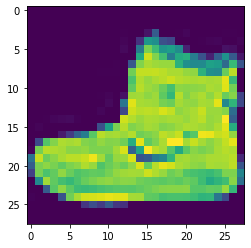

In [17]:
# You can put between 0 to 59999 here
index = 0

# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

# Print the label and image
print(f'LABEL: {training_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {training_images[index]}')

# Visualize the image
plt.imshow(training_images[index])

In [18]:
flt = tf.keras.layers.Flatten() 
flt(training_images[0])

<tf.Tensor: shape=(28, 28), dtype=uint8, numpy=
array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,   0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 

In [41]:
help(tf.keras.layers.Flatten)

Help on class Flatten in module keras.layers.reshaping.flatten:

class Flatten(keras.engine.base_layer.Layer)
 |  Flatten(data_format=None, **kwargs)
 |  
 |  Flattens the input. Does not affect the batch size.
 |  
 |  Note: If inputs are shaped `(batch,)` without a feature axis, then
 |  flattening adds an extra channel dimension and output shape is `(batch, 1)`.
 |  
 |  Args:
 |    data_format: A string,
 |      one of `channels_last` (default) or `channels_first`.
 |      The ordering of the dimensions in the inputs.
 |      `channels_last` corresponds to inputs with shape
 |      `(batch, ..., channels)` while `channels_first` corresponds to
 |      inputs with shape `(batch, channels, ...)`.
 |      It defaults to the `image_data_format` value found in your
 |      Keras config file at `~/.keras/keras.json`.
 |      If you never set it, then it will be "channels_last".
 |  
 |  Example:
 |  
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.layers.Conv2D(64, 3, 3,

In [19]:
# Normalize the pixel values of the train and test images
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [20]:
training_images.shape  # 60000 images each with 28*28 pixel intensity

(60000, 28, 28)

In [21]:
training_labels.shape # labels of all the training data

(60000,)

In [22]:
# Declare sample inputs and convert to a tensor
inputs = np.array([[1.0, 3.0, 4.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function: {inputs.numpy()}')

# Feed the inputs to a softmax activation function
outputs = tf.keras.activations.softmax(inputs)
print(f'output of softmax function: {outputs.numpy()}')

# Get the sum of all values after the softmax
sum = tf.reduce_sum(outputs)
print(f'sum of outputs: {sum}')

# Get the index with highest value
prediction = np.argmax(outputs)
print(f'class with highest probability: {prediction}')

input to softmax function: [[1. 3. 4. 2.]]
output of softmax function: [[0.0320586  0.23688282 0.64391426 0.08714432]]
sum of outputs: 1.0
class with highest probability: 2


In [23]:
model = Sequential([tf.keras.layers.Flatten(),Dense(128,activation = 'relu'),Dense(10, activation = 'softmax')])

In [24]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),metrics=['accuracy']
)

In [25]:
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4981 - accuracy: 0.8264
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3702 - accuracy: 0.8672
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3357 - accuracy: 0.8785
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3116 - accuracy: 0.8861
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2921 - accuracy: 0.8924


In [26]:
# Evaluate the model on unseen data
model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 2ms/step - loss: 0.3441 - accuracy: 0.8788


[0.344127357006073, 0.8787999749183655]

In [27]:
pred_labelss_test = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [28]:
max_  = pred_labelss_test[0].max()
label=-1 
for i in range(0,len(pred_labelss_test[0])):
    if pred_labelss_test[0][i]==max_:
        label = i
        print(label)
    
    

9


In [29]:
#Let's use a different layer
model_2 = Sequential([tf.keras.layers.Flatten(),Dense(512, activation='relu'),Dense(10, activation='softmax')])
model_2.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

model_2.fit(training_images, training_labels, epochs=5)

model_2.evaluate(test_images, test_labels)

classifications = model_2.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.4757 - accuracy: 0.8302
Epoch 2/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3592 - accuracy: 0.8693
Epoch 3/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.3224 - accuracy: 0.8810
Epoch 4/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2982 - accuracy: 0.8901
Epoch 5/5
313/313 [==============================] - 1s 3ms/step
[1.5210263e-08 2.4083453e-08 3.1190315e-09 2.0585156e-10 6.8492407e-09 4.3327594e-04 1.3525165e-08 5.8301259e-03 1.4482955e-08 9.9373651e-01]
9


In [68]:
#Let's use a different layer
model_3 = Sequential([tf.keras.layers.Flatten(),Dense(512, activation='relu'),Dense(64, activation='relu'),Dense(10, activation='linear')])
model_3.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics = ['accuracy'])

model_3.fit(training_images, training_labels, epochs=5)

model_3.evaluate(test_images, test_labels)

classifications = model_3.predict(test_images)

Epoch 1/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4791 - accuracy: 0.8272
Epoch 2/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3581 - accuracy: 0.8684
Epoch 3/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.3245 - accuracy: 0.8806
Epoch 4/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2990 - accuracy: 0.8883
Epoch 5/5
313/313 [==============================] - 1s 3ms/step


In [69]:
#Let's use a different layer
model_4 = Sequential([tf.keras.layers.Flatten(),Dense(1024, activation='relu'),Dense(128, activation='relu'),Dense(10, activation='linear')])
model_4.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics = ['accuracy'])

model_4.fit(training_images, training_labels, epochs=5)

model_4.evaluate(test_images, test_labels)

classifications = model_4.predict(test_images)


Epoch 1/5
1875/1875 [==============================] - 30s 15ms/step - loss: 0.4695 - accuracy: 0.8278
Epoch 2/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.3560 - accuracy: 0.8690
Epoch 3/5
1875/1875 [==============================] - 29s 16ms/step - loss: 0.3228 - accuracy: 0.8797
Epoch 4/5
1875/1875 [==============================] - 29s 16ms/step - loss: 0.2941 - accuracy: 0.8905
Epoch 5/5
313/313 [==============================] - 1s 4ms/step


In [70]:
fmnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = fmnist.load_data()

training_images=training_images/255.0 # Experiment with removing this line
test_images=test_images/255.0 # Experiment with removing this line
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.4751
Epoch 2/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.3597
Epoch 3/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.3220
Epoch 4/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2995
Epoch 5/5
313/313 [==============================] - 1s 3ms/step
[5.1306762e-07 5.5599475e-10 4.4521173e-08 1.6701769e-09 5.4702472e-08 2.2328179e-03 1.6081042e-06 6.8267630e-03 2.5660194e-07 9.9093795e-01]
9


In [30]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') >= 0.6): # Experiment with changing this value
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels) ,  (test_images, test_labels) = fmnist.load_data()

training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])
 

Epoch 1/5
1873/1875 [============================>.] - ETA: 0s - loss: 0.4791 - accuracy: 0.8303
Reached 60% accuracy so cancelling training!
1875/1875 [==============================] - 17s 8ms/step - loss: 0.4790 - accuracy: 0.8303



# Convolutional Neural Networks


In [31]:
#We're not going into the details of convolutions in this notebook (please see resources in the classroom), 
#but the ultimate concept is that they narrow down the content of the image to focus on specific parts

In [32]:
# Define the model
model = tf.keras.models.Sequential([
                                                         
  # Add convolutions and max pooling
  Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  MaxPooling2D(2, 2),
  Conv2D(32, (3,3), activation='relu'),
  MaxPooling2D(2,2),

  # Add the same layers as before
  Flatten(),
  Dense(128, activation='relu'),
  Dense(10, activation='softmax')
])

# Print the model summary
model.summary()

# Use same settings
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5)

# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 800)               0         
                                                                 
 dense_8 (Dense)             (None, 128)              

In [78]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_20 (Flatten)        (None, 800)               0         
                                                                 
 dense_26 (Dense)            (None, 128)             

In [79]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


In [82]:
model.layers
#help(tf.keras.models.Model)

1/1 [==============================] - 0s 29ms/step


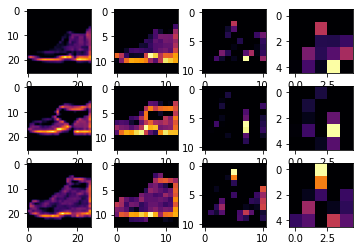

In [83]:
import matplotlib.pyplot as plt
from tensorflow.keras import models

f, axarr = plt.subplots(3,4)

FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 1

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

In [84]:
#Exploring Convolutions

In [85]:
from scipy import misc

# load the ascent image
ascent_image = misc.ascent()

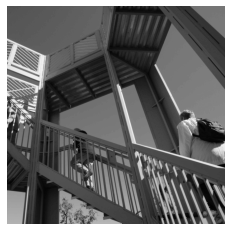

In [86]:
import matplotlib.pyplot as plt

# Visualize the image
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(ascent_image)
plt.show()

In [87]:
import numpy as np

# Copy image to a numpy array
image_transformed = np.copy(ascent_image)

# Get the dimensions of the image
size_x = image_transformed.shape[0]
size_y = image_transformed.shape[1]

In [88]:
# Experiment with different values and see the effect
filter = [ [0, 1, 0], [1, -4, 1], [0, 1, 0]]

# A couple more filters to try for fun!
# filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
# filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]

# If all the digits in the filter don't add up to 0 or 1, you 
# should probably do a weight to get it to do so
# so, for example, if your weights are 1,1,1 1,2,1 1,1,1
# They add up to 10, so you would set a weight of .1 if you want to normalize them
weight  = 1

Now you can create a convolution. You will iterate over the image, leaving a 1 pixel margin, and multiplying each of the neighbors of the current pixel by the value defined in the filter (i.e. the current pixel's neighbor above it and to the left will be multiplied by the top left item in the filter, etc.)

You'll then multiply the result by the weight, and then ensure the result is in the range 0-255.

In [89]:
# Iterate over the image
for x in range(1,size_x-1):
  for y in range(1,size_y-1):
      convolution = 0.0
      convolution = convolution + (ascent_image[x-1, y-1] * filter[0][0])
      convolution = convolution + (ascent_image[x-1, y] * filter[0][1])  
      convolution = convolution + (ascent_image[x-1, y+1] * filter[0][2])     
      convolution = convolution + (ascent_image[x, y-1] * filter[1][0])    
      convolution = convolution + (ascent_image[x, y] * filter[1][1])    
      convolution = convolution + (ascent_image[x, y+1] * filter[1][2])    
      convolution = convolution + (ascent_image[x+1, y-1] * filter[2][0])    
      convolution = convolution + (ascent_image[x+1, y] * filter[2][1])    
      convolution = convolution + (ascent_image[x+1, y+1] * filter[2][2])    
      
      # Multiply by weight
      convolution = convolution * weight   
      
      # Check the boundaries of the pixel values
      if(convolution<0):
        convolution=0
      if(convolution>255):
        convolution=255

      # Load into the transformed image
      image_transformed[x, y] = convolution

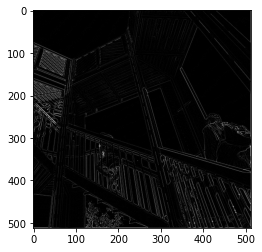

In [90]:
# Plot the image. Note the size of the axes -- they are 512 by 512
plt.gray()
plt.grid(False)
plt.imshow(image_transformed)
plt.show()   

Effect of Max Pooling
The next cell will show a (2, 2) pooling. The idea here is to iterate over the image, and look at the pixel and it's immediate neighbors to the right, beneath, and right-beneath. It will take the largest of them and load it into the new image. Thus, the new image will be 1/4 the size of the old -- with the dimensions on X and Y being halved by this process. You'll see that the features get maintained despite this compression!

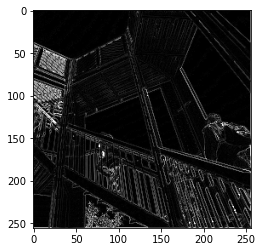

In [91]:
# Assign dimensions half the size of the original image
new_x = int(size_x/2)
new_y = int(size_y/2)

# Create blank image with reduced dimensions
newImage = np.zeros((new_x, new_y))

# Iterate over the image
for x in range(0, size_x, 2):
  for y in range(0, size_y, 2):
    
    # Store all the pixel values in the (2,2) pool
    pixels = []
    pixels.append(image_transformed[x, y])
    pixels.append(image_transformed[x+1, y])
    pixels.append(image_transformed[x, y+1])
    pixels.append(image_transformed[x+1, y+1])

    # Get only the largest value and assign to the reduced image
    newImage[int(x/2),int(y/2)] = max(pixels)

# Plot the image. Note the size of the axes -- it is now 256 pixels instead of 512
plt.gray()
plt.grid(False)
plt.imshow(newImage)
plt.show()

In [2]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

--2023-05-13 09:02:37--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 2404:6800:4009:80f::2010, 2404:6800:4009:809::2010, 2404:6800:4009:80a::2010, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|2404:6800:4009:80f::2010|:443... connected.
ERROR: cannot verify storage.googleapis.com's certificate, issued by 'CN=GTS CA 1C3,O=Google Trust Services LLC,C=US':
  Unable to locally verify the issuer's authority.
To connect to storage.googleapis.com insecurely, use `--no-check-certificate'.


In [5]:
import zipfile

# Unzip the dataset
local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')
zip_ref.close()

In [13]:
import os

# Directory with our training horse pictures
train_horse_dir = os.path.join('./horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('./horse-or-human/humans')

In [7]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse01-0.png', 'horse01-1.png', 'horse01-2.png', 'horse01-3.png', 'horse01-4.png', 'horse01-5.png', 'horse01-6.png', 'horse01-7.png', 'horse01-8.png', 'horse01-9.png']
['human01-00.png', 'human01-01.png', 'human01-02.png', 'human01-03.png', 'human01-04.png', 'human01-05.png', 'human01-06.png', 'human01-07.png', 'human01-08.png', 'human01-09.png']


In [8]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

total training horse images: 500
total training human images: 527


In [9]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

['./horse-or-human/horses\\horse01-8.png', './horse-or-human/horses\\horse01-9.png', './horse-or-human/horses\\horse02-0.png', './horse-or-human/horses\\horse02-1.png', './horse-or-human/horses\\horse02-2.png', './horse-or-human/horses\\horse02-3.png', './horse-or-human/horses\\horse02-4.png', './horse-or-human/horses\\horse02-5.png']
['./horse-or-human/humans\\human01-08.png', './horse-or-human/humans\\human01-09.png', './horse-or-human/humans\\human01-10.png', './horse-or-human/humans\\human01-11.png', './horse-or-human/humans\\human01-12.png', './horse-or-human/humans\\human01-13.png', './horse-or-human/humans\\human01-14.png', './horse-or-human/humans\\human01-15.png']


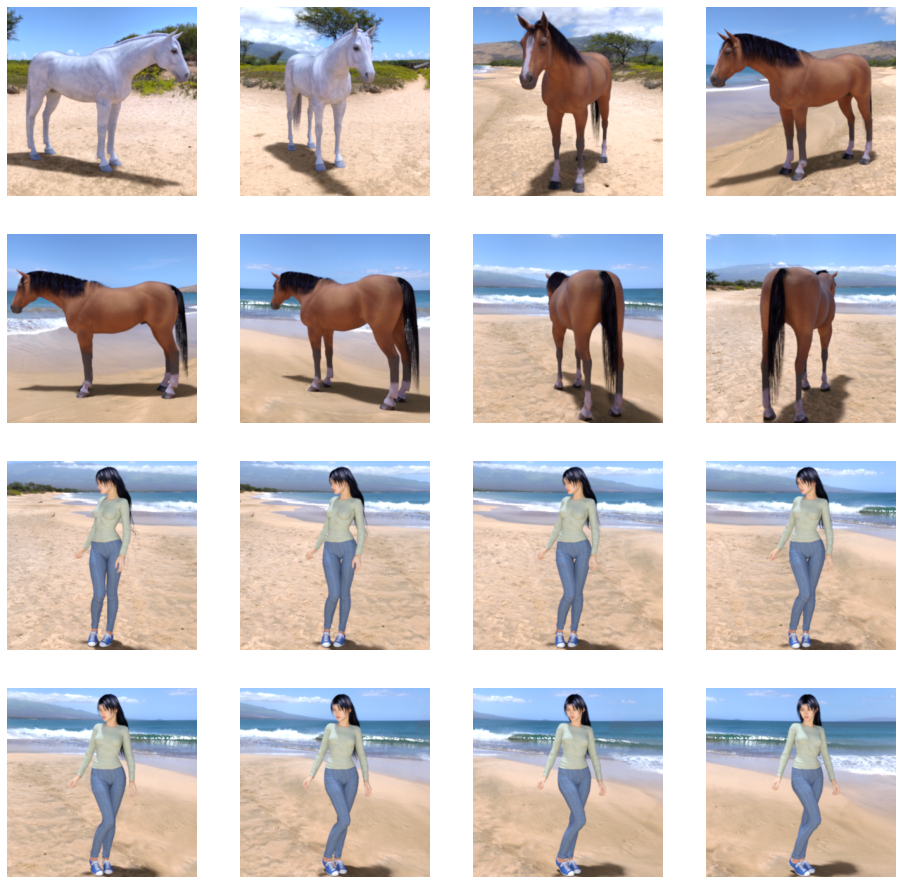

In [11]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]           # list of path to png
print(next_horse_pix)
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]
print(next_human_pix)
for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [14]:
import tensorflow as tf

In [16]:
model = Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    MaxPooling2D(2, 2),
    # The second convolution
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    # The third convolution
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    # The fourth convolution
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    # The fifth convolution
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    Flatten(),
    # 512 neuron hidden layer
    Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    Dense(1, activation='sigmoid')
])

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 149, 149, 16)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 35, 35, 64)      

In [18]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        './horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')


Found 1027 images belonging to 2 classes.


In [24]:
type(train_datagen),type(train_generator)

(keras.preprocessing.image.ImageDataGenerator,
 keras.preprocessing.image.DirectoryIterator)

In [26]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=8,
      verbose=1)

Epoch 1/8
8/8 [==============================] - 41s 5s/step - loss: 0.8408 - accuracy: 0.5740
Epoch 2/8
8/8 [==============================] - 42s 5s/step - loss: 0.6801 - accuracy: 0.6218
Epoch 3/8
8/8 [==============================] - 42s 5s/step - loss: 1.4966 - accuracy: 0.6440
Epoch 4/8
8/8 [==============================] - 42s 5s/step - loss: 0.5291 - accuracy: 0.7275
Epoch 5/8
8/8 [==============================] - 44s 5s/step - loss: 0.5415 - accuracy: 0.7953
Epoch 6/8
8/8 [==============================] - 43s 5s/step - loss: 0.5538 - accuracy: 0.8176
Epoch 7/8
8/8 [==============================] - 52s 6s/step - loss: 0.2640 - accuracy: 0.9209
Epoch 8/8
8/8 [==============================] - 47s 6s/step - loss: 0.2167 - accuracy: 0.9092


In [31]:
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array


In [34]:

path = "horses-g8d06111db_640.jpg"
# predicting images
img = load_img(path, target_size=(300, 300))
x = img_to_array(img)
x /= 255
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(classes[0])
    
if classes[0]>0.5:
    print(path + " is a human")
else:
    print(path + " is a horse")

1/1 [==============================] - 0s 43ms/step
[0.00401319]
horses-g8d06111db_640.jpg is a horse


### Visualizing Intermediate Representations

To get a feel for what kind of features your CNN has learned, one fun thing to do is to visualize how an input gets transformed as it goes through the model.

You can pick a random image from the training set, and then generate a figure where each row is the output of a layer, and each image in the row is a specific filter in that output feature map. Rerun this cell to generate intermediate representations for a variety of training images.

1/1 [==============================] - 0s 188ms/step


C:\Users\Win10\AppData\Local\Temp\ipykernel_8552\1757275065.py:45: RuntimeWarning: invalid value encountered in divide
  x /= x.std()


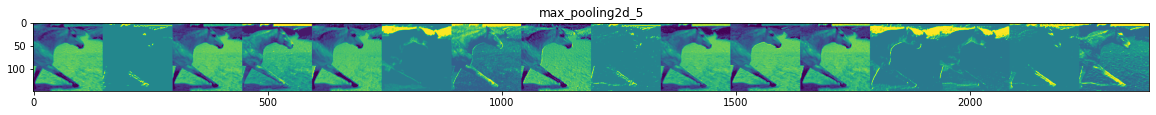

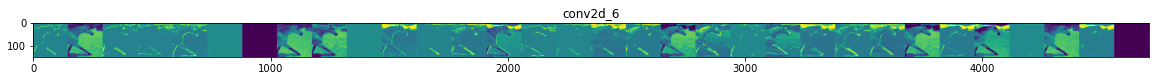

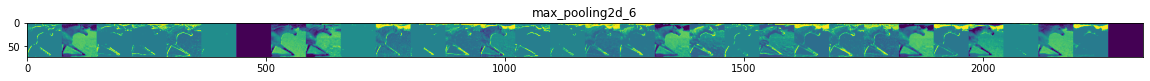

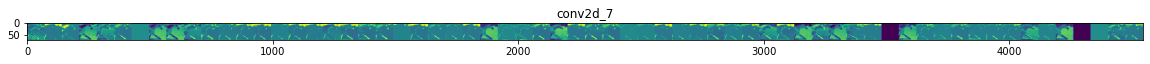

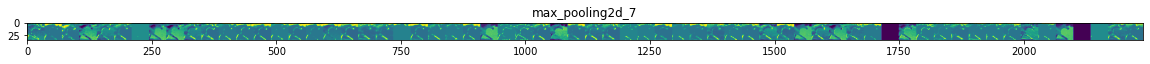

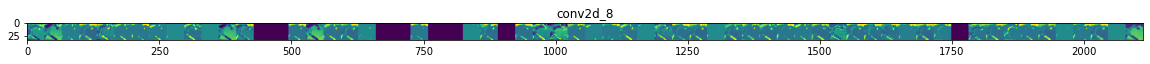

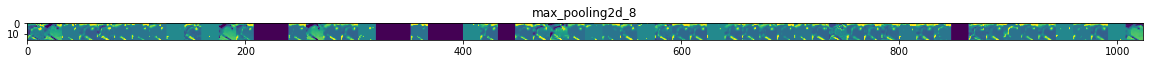

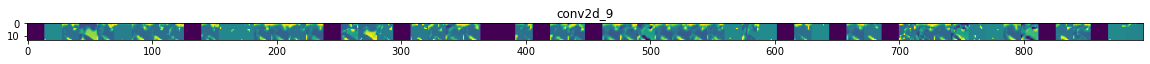

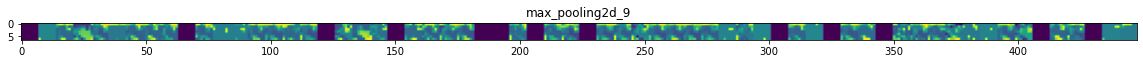

In [35]:
import numpy as np
import random
from tensorflow.keras.utils import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (300, 300, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 300, 300, 3)

# Scale by 1/255
x /= 255

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of the plot
layer_names = [layer.name for layer in model.layers[1:]]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:

    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map

    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    
    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
    
      # Tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    

In [38]:
#convolutional NeuraL Network in Tensorflow